# Blackwell Buying Patterns - Full Pipeline - student


* Name: 
* Updated: 2021.07.27


### The objective of this project is to answer the following questions:

#### Task 1 
* 1a) Do customers in different regions spend more per transaction?
* 1b) Which regions spend the most/least? 
* 2)  Is there a relationship between the number of items purchased and amount spent?

#### Task 2
* 3a) Are there differences in the age of customers between regions? 
* 3b) If so, can we predict the age of a customer in a region based on other demographic data?
* 4a) Is there any correlation between age of a customer and if the transaction was made online or in the store? 
* 4b) Do any other factors predict if a customer will buy online or in our stores?

#### Exercises using digits ds (does not need to be included in the notebook for Task 2): 
* from sklearn import datasets
* show example of data vs target
* dir(digits)    # help on funcs that can be run with digits object
* digits.data
* digits.target

Resource for digits: https://www.c-sharpcorner.com/article/a-complete-scikit-learn-tutorial/


# Import packages

In [1]:
# DS Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# helpers
%matplotlib inline

# Grahpviz 
from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.tree import plot_tree


# Import data

In [2]:
!pwd
!ls

'pwd' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
data = pd.read_csv('Demographic_Data.csv')
print(data.shape)


(80000, 5)


# Evaluate data

In [3]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


# Preprocess/data cleaning

### Duplicates

In [7]:
data.duplicated().any()

True

In [8]:
print(data[data.duplicated()].shape)
data[data.duplicated()]

(21, 5)


,in-store,age,items,amount,region
17858,0,76,6,283.61,2
26112,0,67,4,320.41,2
29343,1,23,2,1019.50,4
33834,1,38,3,1993.80,1
34214,1,31,5,1488.10,4
34706,0,39,5,1268.00,4
35971,0,38,7,391.51,2
43958,1,22,1,1303.20,4
44308,1,26,5,1495.70,4
45164,0,79,6,342.28,2


In [9]:
data = data.drop_duplicates()

In [10]:
data.duplicated().any()

False

### Null values

In [11]:
data.isnull().any()
data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

### Discretize

* Discretize amount and age

In [12]:
pd.cut(data.amount, bins=3, right=True).head()

0        (2.01, 1003.336]
1        (2.01, 1003.336]
2    (1003.336, 2001.668]
3        (2.01, 1003.336]
4    (1003.336, 2001.668]
Name: amount, dtype: category
Categories (3, interval[float64, right]): [(2.01, 1003.336] < (1003.336, 2001.668] < (2001.668, 3000.0]]

In [13]:
# Discretize amount - eg., 0-1000, 1001-2000, 2001+
amtBin = ['$0-700', '$701-1400', '$1401-2100', '$2101-3000']
cut_bins = [2, 700, 1503, 2252, 3000]
data ['amtBin'] = pd.cut(data ['amount'], bins = cut_bins, labels = amtBin)
data.head()

,in-store,age,items,amount,region,amtBin
0,0,37,4,281.03,2,$0-700
1,0,35,2,219.51,2,$0-700
2,1,45,3,1525.70,4,$1401-2100
3,1,46,3,715.25,3,$701-1400
4,1,33,4,1937.50,1,$1401-2100


In [14]:
# Get help for a function
?pd.qcut 
# or help(pd.qcut)

In [15]:
pd.cut(data['age'], bins = 3)
pd.cut(data ['age'], bins = 3). value_counts()

(40.333, 62.667]    34403
(17.933, 40.333]    32885
(62.667, 85.0]      12691
Name: age, dtype: int64

In [18]:
pd.cut(data.age, bins=3, right=True).head()

0    (17.933, 40.333]
1    (17.933, 40.333]
2    (40.333, 62.667]
3    (40.333, 62.667]
4    (17.933, 40.333]
Name: age, dtype: category
Categories (3, interval[float64, right]): [(17.933, 40.333] < (40.333, 62.667] < (62.667, 85.0]]

In [19]:
# Discretize age - eg., 18-33, 34-49, 50-64, 65+
ageBin = ['0-18', '19-37', '38-56', '57-75', '75-93']
cut_bins = [0, 17, 34, 51, 68, 85]
data ['ageBin'] = pd.cut(data ['age'], bins = cut_bins, labels = ageBin)
data.head()

,in-store,age,items,amount,region,amtBin,ageBin
0,0,37,4,281.03,2,$0-700,38-56
1,0,35,2,219.51,2,$0-700,38-56
2,1,45,3,1525.70,4,$1401-2100,38-56
3,1,46,3,715.25,3,$701-1400,38-56
4,1,33,4,1937.50,1,$1401-2100,19-37


In [18]:
# add amtBin and ageBin to the dataset

# Analyze Data
### Statistical Analysis

In [20]:
# output statistics
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


### Visualizations

In [21]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region', 'amtBin', 'ageBin'], dtype='object')


#### Histogram

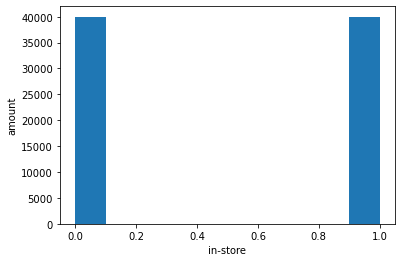

In [22]:
plt.hist(data['in-store'])
plt.ylabel('amount')
plt.xlabel('in-store')
plt.show()

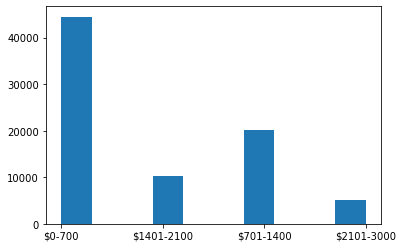

In [23]:
plt.hist(data['amtBin'])
plt.show()

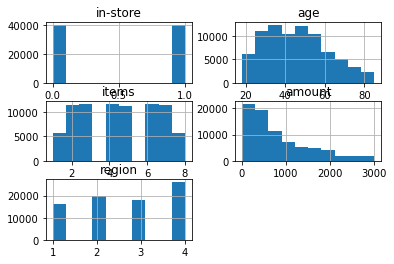

In [24]:
data.hist()
plt.show()

#### Scatter

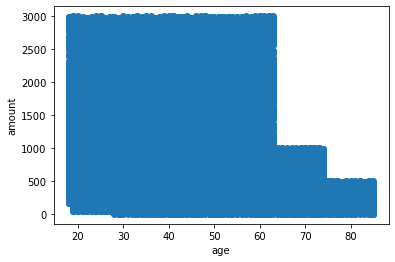

In [25]:
# Scatter plot example
data_sample = data
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
# assignment: add axis titles
plt.ylabel('amount')
plt.xlabel('age')
plt.show()


Index(['in-store', 'age', 'items', 'amount', 'region', 'amtBin', 'ageBin'], dtype='object')


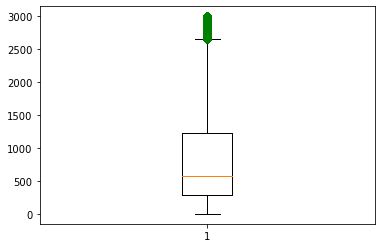

In [26]:
# Box plot example
# eval col names/features
header = data.dtypes.index
print(header)
# plot
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()


#### Stacked Col 
Focus on answering the following business questions:
* 1a) Do customers in different regions spend more per transaction (number of obs per spend category)?
* 1b) Which regions spend the most/least (overall - just from looking at the chart)? 
* 3a) Are there differences in the age of customers between regions?

In [26]:
#1a) Do customers in different regions spend more per transaction (number of obs per spend category)?

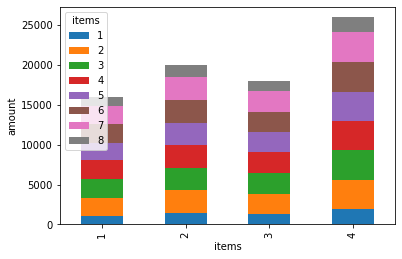

In [27]:
np.random.seed(1)
data.groupby('region')['items']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
plt.ylabel('amount')
plt.xlabel('items')
plt.show()

In [28]:
#1b) Which regions spend the most/least (overall - just from looking at the chart)?

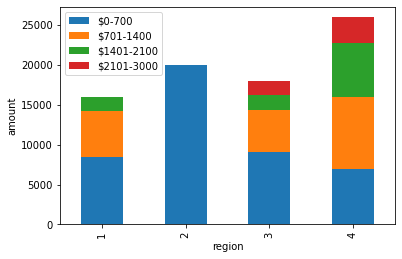

In [28]:
np.random.seed(1)
data.groupby('region')['amtBin']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
plt.ylabel('amount')
plt.xlabel('region')
plt.show()

In [30]:
#3a) Are there differences in the age of customers between regions?

In [29]:
data.groupby(['region']).mean()

,in-store,age,items,amount
region,,,,
1,1.000000,43.704132,4.510283,744.990939
2,0.000000,56.609083,4.512804,252.097741
3,0.611056,45.646944,4.494000,917.969637
4,0.500000,38.752424,4.503771,1283.938357


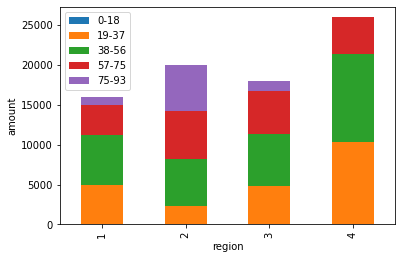

In [30]:
np.random.seed(1)
data.groupby('region')['ageBin']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
plt.ylabel('amount')
plt.xlabel('region')
plt.show()

# Feature Selection
For this task, you will not be selecting features. Instead, focus on answering the following questions:
* 2) Is there a relationship between the number of items purchased and amount spent?
* 4a) Is there any correlation between age of a customer and if the transaction was made online or in the store?


### Correlation

In [31]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


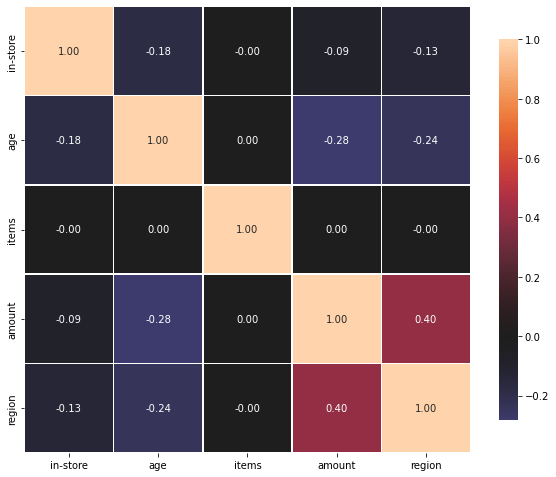

In [32]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_mat, vmax=1.0, center=0, fmt='.2f',
square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

### Covariance

In [33]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


# Train/Test Sets
* The modeling (predicitive analytics) process begins with splitting data in to train and test sets. 
* Focus on buiding models to answer the following questions:
* 3b) Can we predict the age of a customer in a region based on other demographic data? (Decision tree.)
* 4a) Is there any correlation between age of a customer and if the transaction was made online or in the store? (In addition to correlation analysis, a decision tree can also provide insight.)
* 4b) Do any other factors predict if a customer will buy online or in our stores? (Decison tree.)


### Set random seed

In [34]:
seed = 123

### Split datasets into X (IVs) and y (DV)
* For each ds, split into X, y
* oob (out-of-box; no feature selection or feature engineering)

In [35]:
# pring column names for quick reference
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region', 'amtBin', 'ageBin'], dtype='object')

In [36]:
ageBin = ['0-18', '19-37', '38-56', '57-75', '75-93']
cut_bins = [0, 17, 34, 51, 68, 85]
data ['ageBin'] = pd.cut(data ['age'], bins = cut_bins, labels = ageBin)
amtBin = ['$0-700', '$701-1400', '$1401-2100', '$2101-3000']
cut_bins = [2, 700, 1503, 2252, 3000]
data ['amtBin'] = pd.cut(data ['amount'], bins = cut_bins, labels = amtBin)
inplace=True
data.head()

,in-store,age,items,amount,region,amtBin,ageBin
0,0,37,4,281.03,2,$0-700,38-56
1,0,35,2,219.51,2,$0-700,38-56
2,1,45,3,1525.70,4,$1401-2100,38-56
3,1,46,3,715.25,3,$701-1400,38-56
4,1,33,4,1937.50,1,$1401-2100,19-37


In [37]:
data["ageBin"] = data["age"]
data["ageBin"].replace({"0-18":1,"19-37":2,"38-56":3,"57-75":4,"75-93":5}, inplace =True)


data["amtBin"] = data["amount"]
data["amtBin"].replace({"$0-700":1,"$701-1400":2,"$1401-2100":3,"$2101-3000":4}, inplace = True)
data

,in-store,age,items,amount,region,amtBin,ageBin
0,0,37,4,281.03,2,281.03,37
1,0,35,2,219.51,2,219.51,35
2,1,45,3,1525.70,4,1525.70,45
3,1,46,3,715.25,3,715.25,46
4,1,33,4,1937.50,1,1937.50,33
...,...,...,...,...,...,...,...
79995,1,71,3,558.82,1,558.82,71
79996,0,59,7,1932.00,3,1932.00,59
79997,0,54,1,414.16,2,414.16,54
79998,1,49,4,335.32,1,335.32,49


In [38]:
## For question 3b): set region as dv
Y_oobQ3 = data['region']
# select IVs/features
X_oobQ3 = data[['in-store','ageBin','items','amtBin']]
# select Age/Amt binned features
X_oobQ3ageAmt = data[['in-store','ageBin','items','amtBin']]
x.head()

0    37
1    35
2    45
3    46
4    33
Name: age, dtype: int64

In [39]:
## For questions Q4a/Q4b): set in-store as dv 
Y_oobQ4 = data['in-store']
# select IVs/features
X_oobQ4 = data[['region','age','items','amount']]
# select Age/Amt binned features
X_oobQ4ageAmt = data[['region','ageBin','items','amtBin']]

In [40]:
Y_oobQ4B = data['in-store']
X_oobQ4B = data[['region','age','items','amount']]
# select Age/Amt binned features
X_oobQ4BageAmt = data[['region','ageBin','items','amtBin']]

### Create train and test sets

In [41]:
# Q3b) region as dv; un-binned data

X_trainQ3, X_testQ3, Y_trainQ3, Y_testQ3 = train_test_split(X_oobQ3, 
                                            Y_oobQ3, 
                                            test_size = .30, 
                                            random_state = seed)

print(X_trainQ3.shape, X_testQ3.shape)
print(Y_trainQ3.shape, Y_testQ3.shape)

(55985, 4) (23994, 4)
(55985,) (23994,)


In [42]:
# Q4a) in-store as dv

X_trainQ4, X_testQ4, Y_trainQ4, Y_testQ4 = train_test_split(X_oobQ4, 
                                            Y_oobQ4, 
                                            test_size = .30, 
                                            random_state = seed)

print(X_trainQ4.shape, X_testQ4.shape)
print(Y_trainQ4.shape, Y_testQ4.shape)

(55985, 4) (23994, 4)
(55985,) (23994,)


In [43]:
# Q4b) in-store as dv; age binned & amount binned

X_trainQ4B, X_testQ4B, Y_trainQ4B, Y_testQ4B =  train_test_split(X_oobQ4B, 
                                            Y_oobQ4B, 
                                            test_size = .30, 
                                            random_state = seed)

print(X_trainQ4B.shape, X_testQ4B.shape)
print(Y_trainQ4B.shape, Y_testQ4B.shape)

(55985, 4) (23994, 4)
(55985,) (23994,)


# Modeling
#### Two purposes of modeling:
* 1) Evaluate patterns in data
* 2) Make predictions
  

## Evaluate patterns in data using a Decision Tree (DT)

In [110]:
#3b) Can we predict the age of a customer in a region based on other demographic data? (Decision tree.)

### dv = region


In [44]:
# use the dataset that has region as the dv

# run code to fit and predict the DecisionTreeClassifier


# select DT model for classification
dt = DecisionTreeClassifier(max_depth=3)

# train/fit the mode using region as dv, and binned by age & amt
dtModel3 = dt.fit(X_trainQ3, Y_trainQ3)

# make predicitons with the trained/fit model
dtPred3 = dtModel3.predict(X_testQ3)

# performance metrics
print(accuracy_score(Y_testQ3, dtPred3))
print(classification_report(Y_testQ3, dtPred3))

0.6351171126114862
              precision    recall  f1-score   support

           1       0.41      0.68      0.51      4838
           2       0.90      1.00      0.95      5979
           3       0.54      0.11      0.18      5391
           4       0.65      0.70      0.67      7786

    accuracy                           0.64     23994
   macro avg       0.63      0.62      0.58     23994
weighted avg       0.64      0.64      0.60     23994



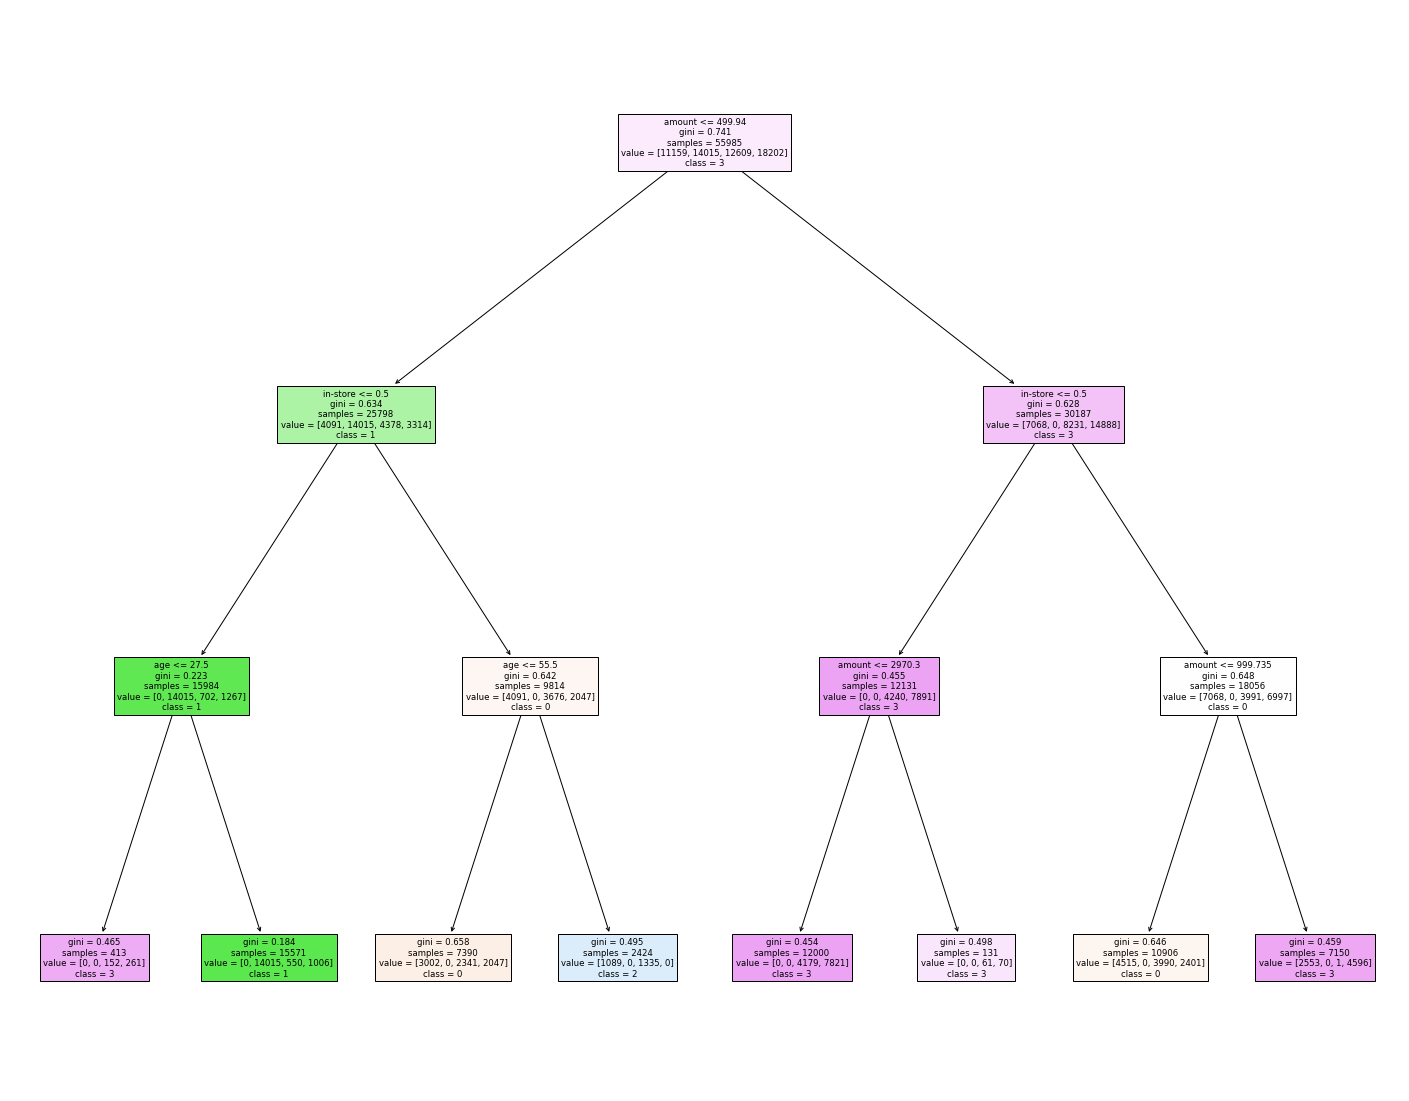

In [45]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtModel3, feature_names=data.columns,class_names=['0', '1', '2', '3'], filled=True)

In [ ]:
# 3b) Is age in the DT? If so, what decision rules incorporate age? 

# Other questions: From the above DT, is the 'items' feature in the tree? 
# What does it mean if it is, or is not, in the tree?

### dv = in-store


In [60]:
# run DT model

# code goes here
# select DT model for classification
dt = DecisionTreeClassifier(max_depth=3)

# train/fit the mode using region as dv, and binned by age & amt
dtModel4 = dt.fit(X_trainQ4, Y_trainQ4)

# make predicitons with the trained/fit model
dtPred4 = dtModel4.predict(X_testQ4)

# performance metrics
print(accuracy_score(Y_testQ4, dtPred4))
print(classification_report(Y_testQ4, dtPred4))

0.8380428440443444
              precision    recall  f1-score   support

           0       1.00      0.67      0.80     11874
           1       0.76      1.00      0.86     12120

    accuracy                           0.84     23994
   macro avg       0.88      0.84      0.83     23994
weighted avg       0.88      0.84      0.83     23994



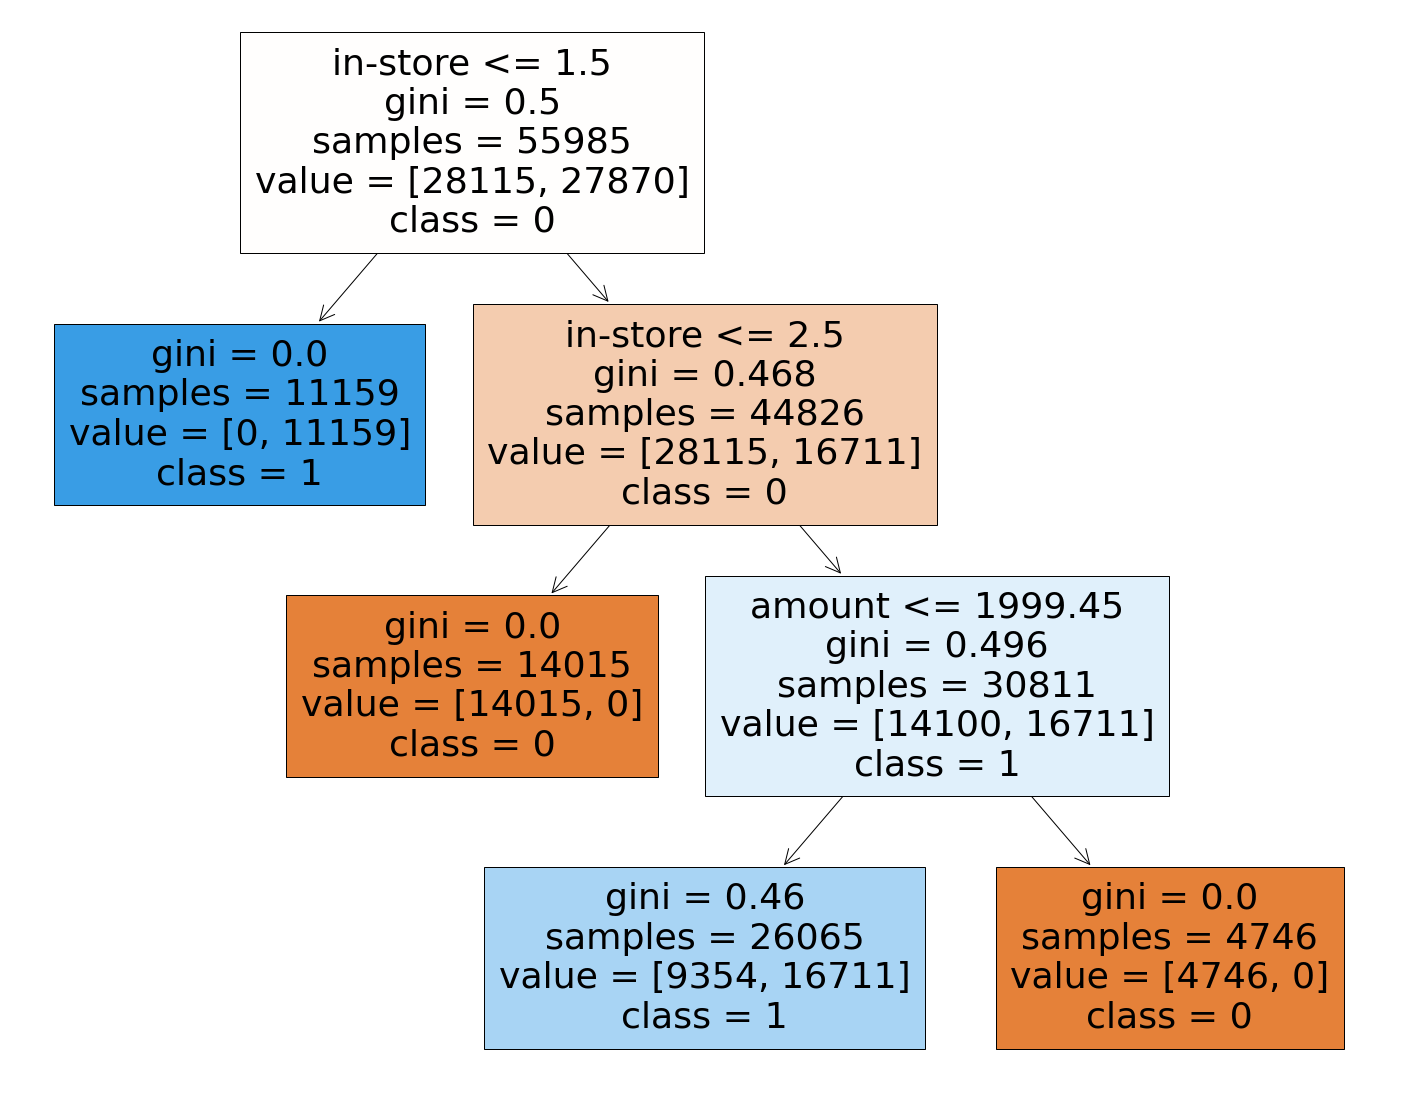

In [61]:
# visualize DT

# code goes here
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtModel4, feature_names=data.columns,class_names=['0', '1'], filled=True)

In [ ]:
# 4b) Do any factors predict if a customer will buy online or
# in our stores?


## Make Predictions
* Focus on the following question: Can a model be developed that can accurately classify where a transaction took place (in-store/online)?

### Select models

In [62]:
# create empty list and then populate it with the following models

models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

# create empty lists to hold results and model names
results = []
names = []


In [63]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [64]:
from sklearn import ensemble
rf_clf= ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_trainQ4, Y_trainQ4)
rf_clf.score(X_testQ4, Y_testQ4)

0.861632074685338

In [65]:
gb_clf= ensemble.GradientBoostingClassifier(n_estimators=40)
gb_clf.fit(X_trainQ4, Y_trainQ4)
gb_clf.score(X_testQ4, Y_testQ4)

0.88367925314662

### CV (cross-validation)


In [66]:
# Set in-store as dv; unbinned data

Y_oobQ4 = data['in-store']
# select IVs/features
X_oobQ4 = data[['region','age','items','amount']]
for name, model in models:
    kfold = KFold(n_splits=3, random_state=seed, shuffle=True)
    result = cross_val_score(model,
                             X_trainQ4,
                             Y_trainQ4,   
                             cv=kfold,
                             scoring='accuracy')
    names.append(name)
    results.append(result)
    #msg = '%s: %.4f (%.4f)' % (name, result.mean(), result.std())
    #print(msg)

# print results
for i in range(len(names)):
    print(names[i],results[i].mean())

DT 0.8460302452648537
RF 0.8625524884669918
GB 0.8862910539963224


In [67]:
# Same as above, but using binned data for age and amount
Y_oobQ4 = data['in-store']
# select Age/Amt binned features
X_oobQ4ageAmt = data[['region','ageBin','items','amtBin']]
for name, model in models:
    kfold = KFold(n_splits=3, random_state=seed, shuffle=True)
    result = cross_val_score(model,
                             X_trainQ4,
                             Y_trainQ4,   
                             cv=kfold,
                             scoring='accuracy')
    names.append(name)
    results.append(result)
    #msg = '%s: %.4f (%.4f)' % (name, result.mean(), result.std())
    #print(msg)

# print results
for i in range(len(names)):
    print(names[i],results[i].mean())

DT 0.8460302452648537
RF 0.8625524884669918
GB 0.8862910539963224
DT 0.8463696387936772
RF 0.8629990401594213
GB 0.8862910539963224


In [ ]:
# Based all of the above model runs, which is the most accurate?
# Is the accuracy of the top model higher than 75%?


In [ ]:
?cross_val_score